In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn import metrics
import math
import warnings
warnings.filterwarnings("ignore")

In [133]:
df= pd.read_csv('oil production dataset.csv')
df

,Year,Production
0,1961,2.15
1,1962,2.23
2,1963,2.23
3,1964,2.31
4,1965,2.09
5,1966,2.02
6,1967,2.32
7,1968,2.16
8,1969,2.26
9,1970,2.71


array([[<AxesSubplot: title={'center': 'Production'}>]], dtype=object)

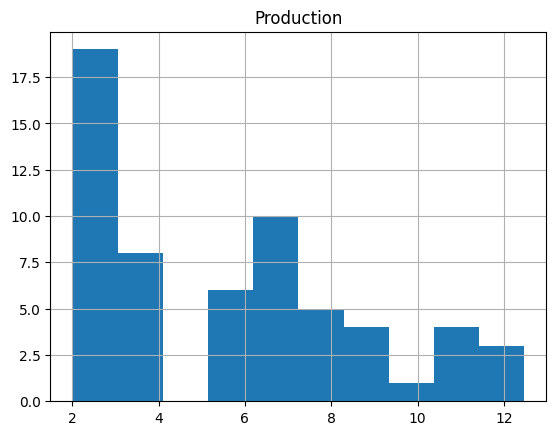

In [134]:
df.hist('Production')

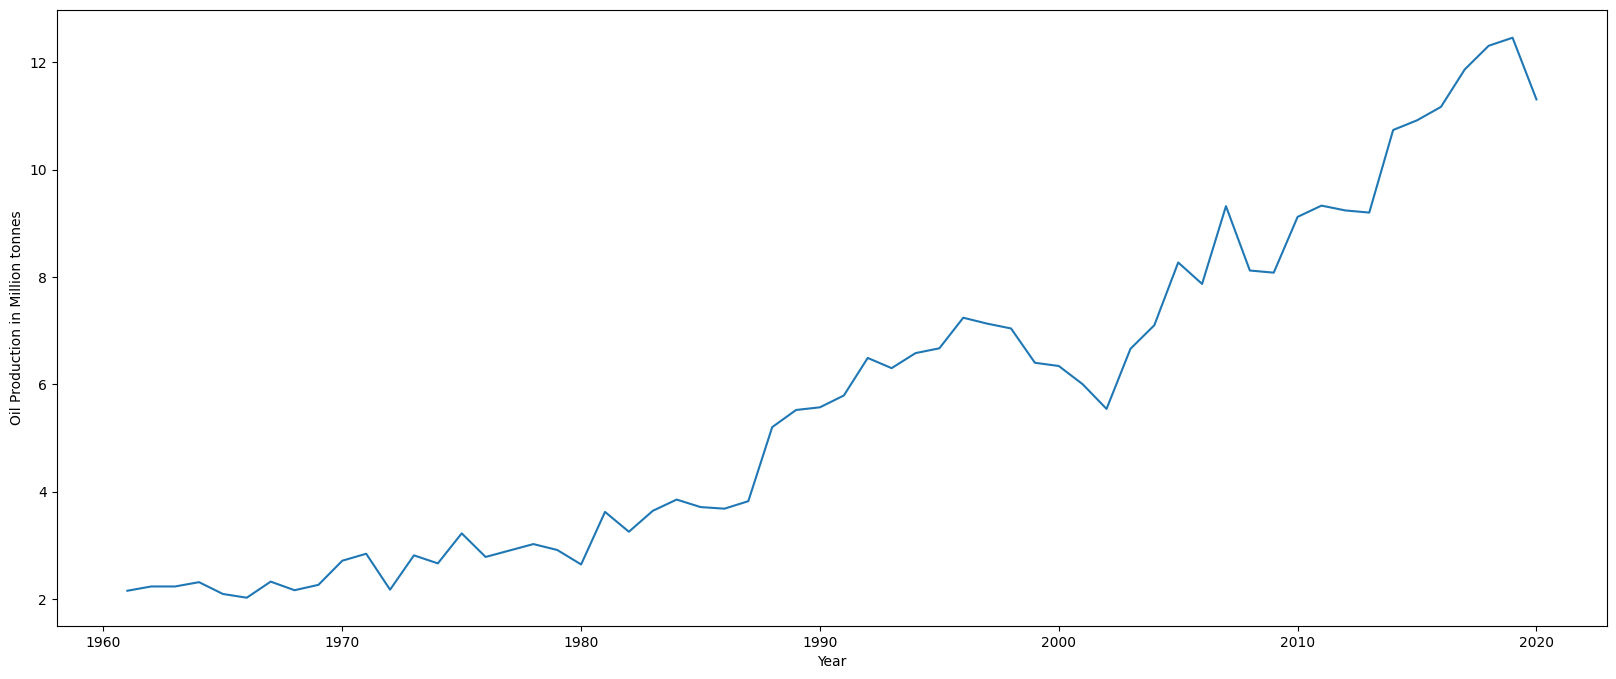

In [135]:
plt.figure(figsize=(20,8))
plt.plot(df['Year'],df['Production'])
plt.xlabel('Year')
plt.ylabel('Oil Production in Million tonnes')
plt.show()

In [136]:
train = df.iloc[0:52,1]
test = df.iloc[52:60,1]
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (52,)
Test Shape :  (8,)


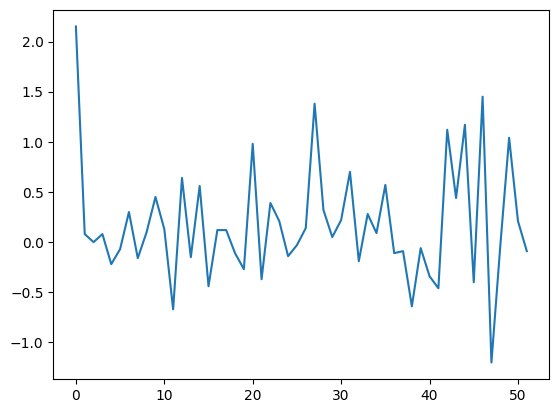

In [137]:
df_d = train.diff().fillna(train)
plt.plot(df_d)
plt.show()

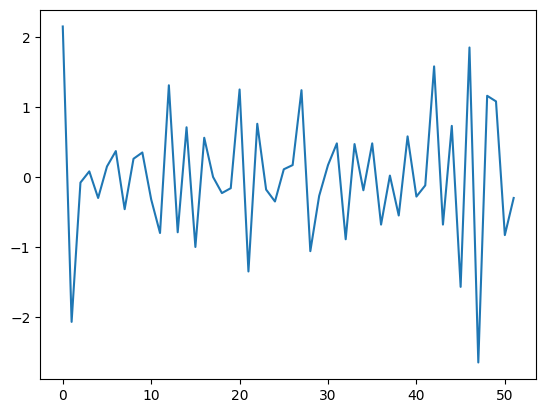

In [138]:
df_d1 = df_d.diff().fillna(df_d)
plt.plot(df_d1)
plt.show()

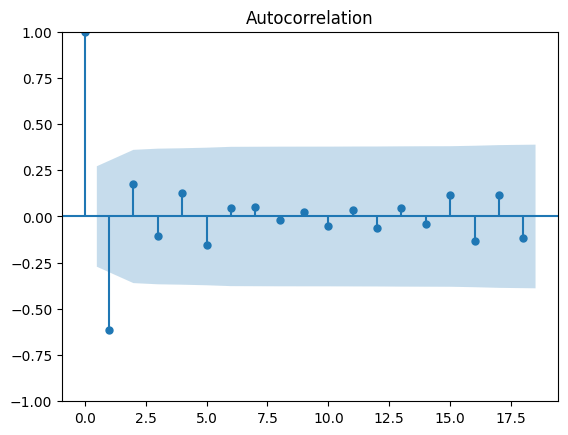

In [139]:
plot_acf(df_d1)
plt.show()

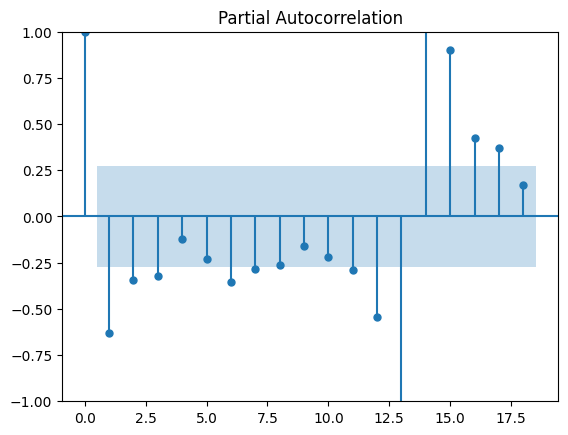

In [140]:
plot_pacf(df_d1)
plt.show()

In [141]:
model1 = ARIMA(train, order= (5,2,0))
model_fit1 = model1.fit()
model_fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   52
Model:                 ARIMA(5, 2, 0)   Log Likelihood                 -42.154
Date:                Thu, 22 Dec 2022   AIC                             96.309
Time:                        01:32:14   BIC                            107.781
Sample:                             0   HQIC                           100.677
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.139     -7.175      0.000      -1.271      -0.726
ar.L2         -0.6914      0.158     -4.362      0.000      -1.002      -0.381
ar.L3         -0.4219      0.223     -1.890      0.059      -0.859       0.016
ar.L4         -0.1524      0.234     -0.650      0.515      -0.612       0.307
ar.L5         -0.1294      0.158     -0.821      0.412      -0.438       0.180
sigma2         0.3085      0.057      5.414      0.000       0.197       0.420
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.65   Prob(JB):                         0.19
Heteroskedasticity (H):               5.51   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
start = 53
end = 60
yhat = model_fit1.predict(start = start, end = end, typ = 'levels')
print(yhat)

53     9.887454
54    10.090551
55    10.386219
56    10.648590
57    10.835690
58    11.118385
59    11.351199
60    11.592595
Name: predicted_mean, dtype: float64


In [143]:
MSE = metrics.mean_squared_error(test,yhat)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(test,yhat)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  0.7511768658427995
MSE:  0.656276308443665
RMSE:  0.8101088250622043


In [149]:
def objective_function(parameters):
    # unpack the parameters
    p, d, q = parameters
    # make sure that the parameters are integers
    p = 5
    d = 2
    q = 0
    # try fitting an ARIMA model with the given parameters
    try:
        model = ARIMA(df['Production'].values, order=(p, d, q))
        model_fit = model.fit(disp=False)
    except:
        # if the model cannot be fit, return a large error
        return np.inf
    # return the AIC of the fitted model
    return model_fit.aic

# define the lower and upper bounds for the p, d, and q parameters
lower_bounds = np.array([3, 2, 0])
upper_bounds = np.array([5, 2, 5])

# number of particles in the swarm
num_particles = 10
# number of dimensions (p, d, q)
num_dimensions = 3
# maximum velocity
max_velocity = 0.5 * (upper_bounds - lower_bounds)
# maximum acceleration
max_acceleration = 0.5 * max_velocity
# maximum number of iterations
max_iterations = 100

# initialize the positions and velocities of the particles
positions = lower_bounds + (upper_bounds - lower_bounds) * np.random.rand(num_particles, num_dimensions)
velocities = -max_velocity + 2 * max_velocity * np.random.rand(num_particles, num_dimensions)

# initialize the best known positions and values for each particle
best_positions = positions.copy()
best_values = np.array([objective_function(pos) for pos in positions])

# initialize the best known position and value overall
global_best_position = best_positions[np.argmin(best_values)]
global_best_value = np.min(best_values)

In [150]:
for iteration in range(max_iterations):
    # update the velocities of the particles
    velocities = velocities + max_acceleration * np.random.rand(num_particles, num_dimensions)
    velocities = np.clip(velocities, -max_velocity, max_velocity)
    # update the positions of the particles
    positions = positions + velocities
    # keep the positions within the bounds
    positions = np.clip(positions, lower_bounds, upper_bounds)
    # evaluate the objective function at the new positions
    values = np.array([objective_function(pos) for pos in positions])
    # update the best known positions and values for each particle
    update_idx = values < best_values
    best_values[update_idx] = values[update_idx]
    best_positions[update_idx] = positions[update_idx]
    # update the best known position and value overall
    if np.min(best_values) < global_best_value:
        global_best_value = np.min(best_values)
        global_best_position = best_positions[np.argmin(best_values)]

# print the optimal parameters and the corresponding loss (AIC)
print("Optimal parameters:", global_best_position)
print("Loss (AIC):", global_best_value)

Optimal parameters: [4.67786415 2.         1.89300466]
Loss (AIC): inf


In [151]:
model = ARIMA(train, order= (5,2,2))
model_fit2 = model.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   52
Model:                 ARIMA(5, 2, 2)   Log Likelihood                 -37.311
Date:                Thu, 22 Dec 2022   AIC                             90.621
Time:                        01:33:30   BIC                            105.917
Sample:                             0   HQIC                            96.446
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0251      0.765     -0.033      0.974      -1.525       1.474
ar.L2          0.0735      0.229      0.321      0.748      -0.374       0.521
ar.L3         -0.0063      0.159     -0.039      0.969      -0.317       0.304
ar.L4         -0.0008      0.169     -0.004      0.996      -0.333       0.331
ar.L5         -0.2491      0.201     -1.239      0.215      -0.643       0.145
ma.L1         -1.1985      0.861     -1.392      0.164      -2.886       0.489
ma.L2          0.2326      0.802      0.290      0.772      -1.340       1.805
sigma2         0.2421      0.046      5.263      0.000       0.152       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.65   Prob(JB):                         0.27
Heteroskedasticity (H):               4.93   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
start = 53
end = 60
yhat = model_fit2.predict(start = start, end = end, typ = 'levels')
print(yhat)

53     9.950338
54     9.934524
55    10.104278
56    10.329845
57    10.419351
58    10.593362
59    10.808171
60    10.982755
Name: predicted_mean, dtype: float64


In [153]:
MSE = metrics.mean_squared_error(test,yhat)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(test,yhat)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  1.0447563532874657
MSE:  1.3087394785210005
RMSE:  1.144001520331595


In [155]:
model2 = ARIMA(df['Production'], order= (5,2,0))
model_fit2 = model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   60
Model:                 ARIMA(5, 2, 0)   Log Likelihood                 -51.227
Date:                Thu, 22 Dec 2022   AIC                            114.455
Time:                        01:33:45   BIC                            126.817
Sample:                             0   HQIC                           119.270
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9918      0.147     -6.765      0.000      -1.279      -0.704
ar.L2         -0.6695      0.168     -3.984      0.000      -0.999      -0.340
ar.L3         -0.3731      0.251     -1.485      0.137      -0.865       0.119
ar.L4          0.0568      0.223      0.255      0.799      -0.380       0.494
ar.L5          0.1214      0.129      0.942      0.346      -0.131       0.374
sigma2         0.3346      0.051      6.507      0.000       0.234       0.435
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               4.54   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
start = 1
end = 64
yhat2 = model_fit2.predict(start = start, end = end, typ = 'levels')
print(yhat2)

1      3.225000
2      2.310001
3      2.279518
4      2.351119
5      2.139532
        ...    
60    11.774623
61    11.656278
62    11.472106
63    11.032025
64    11.041319
Name: predicted_mean, Length: 64, dtype: float64


In [157]:
year = df['Year'] 

year = pd.DataFrame(year)
dict = {'Year':['2021', '2022','2023','2024']}
year2 = pd.DataFrame(dict)
yhat2 = pd.DataFrame(yhat2)
yhat2 = yhat2.reset_index()
yhat2 = yhat2.drop('index',1)
df3 = pd.concat([year, year2], ignore_index = True)
df3 = df3.reset_index()
df3['Actual'] = df['Production']
df3['Predictions'] = yhat2
df3 = df3.fillna('')
df3

,index,Year,Actual,Predictions
0,0,1961,2.15,3.225000
1,1,1962,2.23,2.310001
2,2,1963,2.23,2.279518
3,3,1964,2.31,2.351119
4,4,1965,2.09,2.139532
...,...,...,...,...
59,59,2020,11.31,11.774623
60,60,2021,,11.656278
61,61,2022,,11.472106
62,62,2023,,11.032025


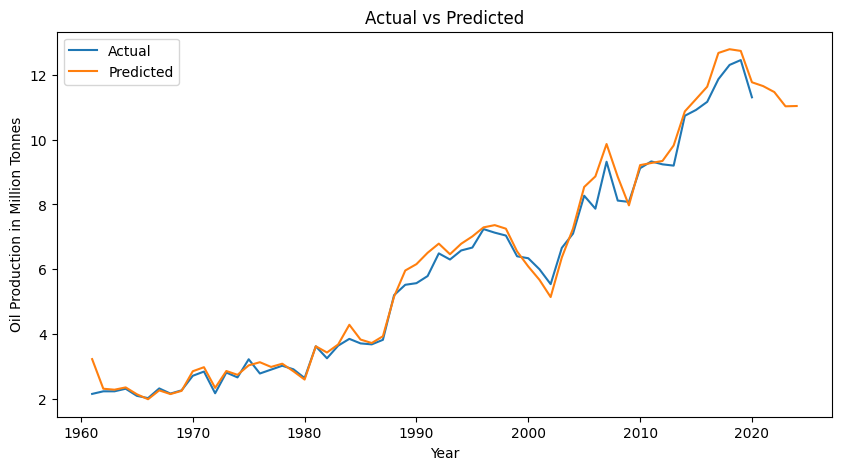

In [158]:
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Production'], label = "Actual")
plt.plot(df3['Year'], df3['Predictions'], label = "Predicted")
plt.xlabel('Year')
plt.ylabel('Oil Production in Million Tonnes')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()